In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 12  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 15  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 17  # Font size of title

# Synthetic data

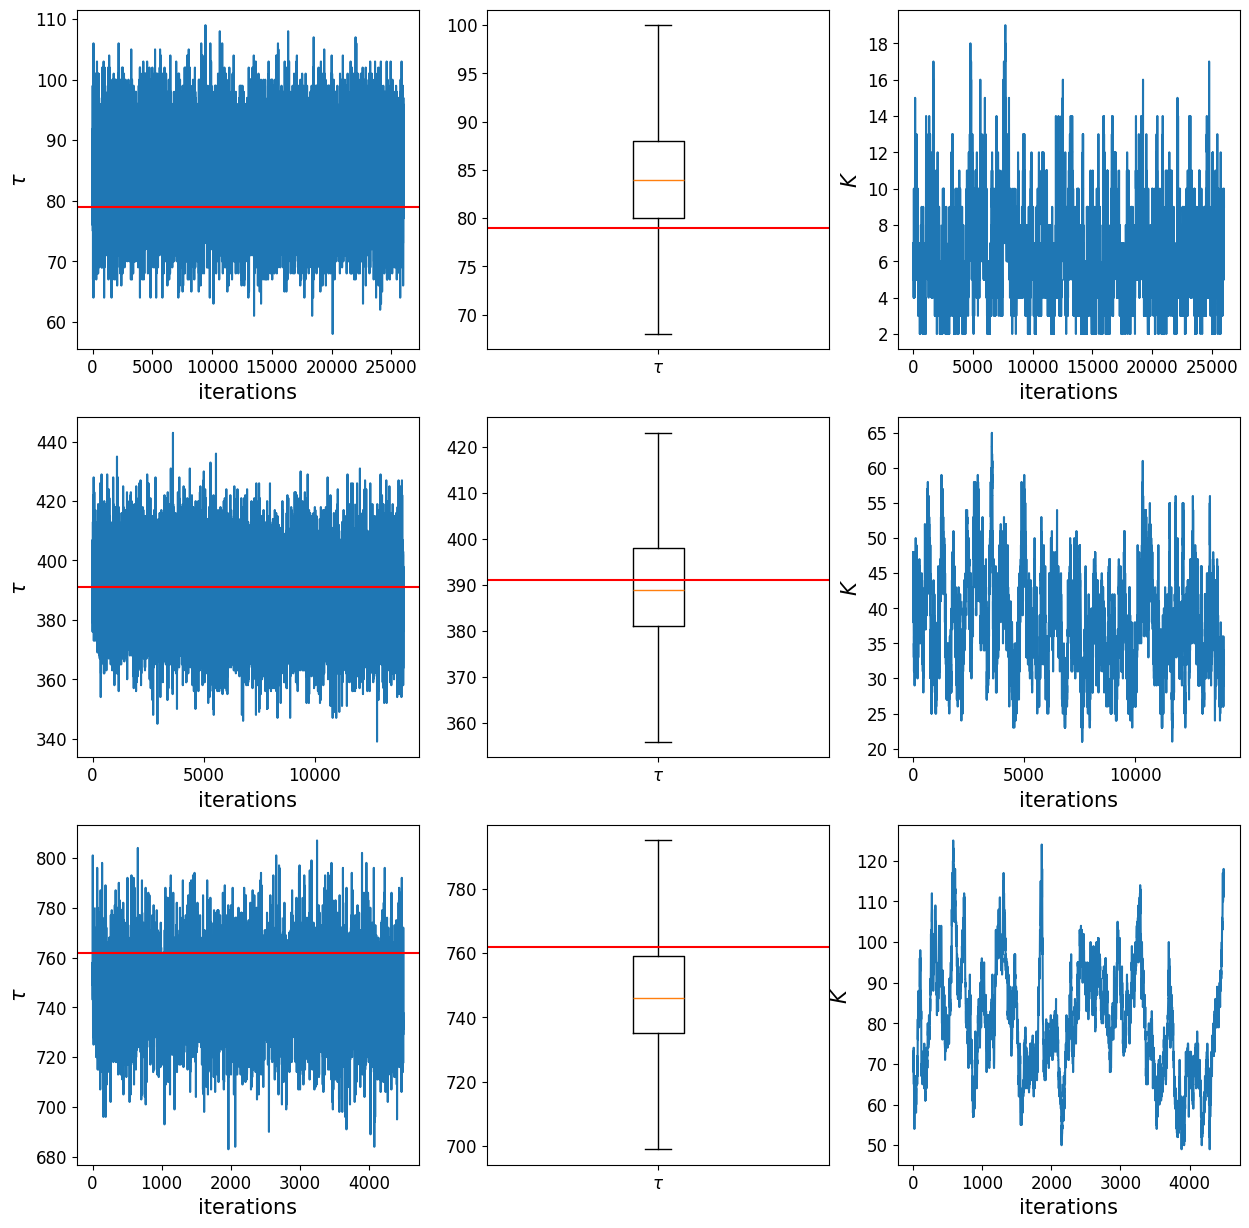

In [4]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

path = "data/synthetic/BNP/sampling/"
tau_insample = [79, 391, 762]
n_list = [1000, 5000, 10000]
times = [36478, 43258, 51316]

for i in range(3):

    tau_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_tau.npy")[1000:]
    K_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_K.npy")[1000:]

    ax[i,0].plot(tau_chain)
    ax[i,0].axhline(y=tau_insample[i], color = "red")
    ax[i,0].set_xlabel("iterations")
    ax[i,0].set_ylabel(r"$\tau$")

    ax[i,1].boxplot(tau_chain, showfliers=False)
    ax[i,1].axhline(y=tau_insample[i], color = "red")
    ax[i,1].set_xticklabels([r"$\tau$"])

    ax[i,2].plot(K_chain)
    ax[i,2].set_xlabel("iterations")
    ax[i,2].set_ylabel(r"$K$")

    ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

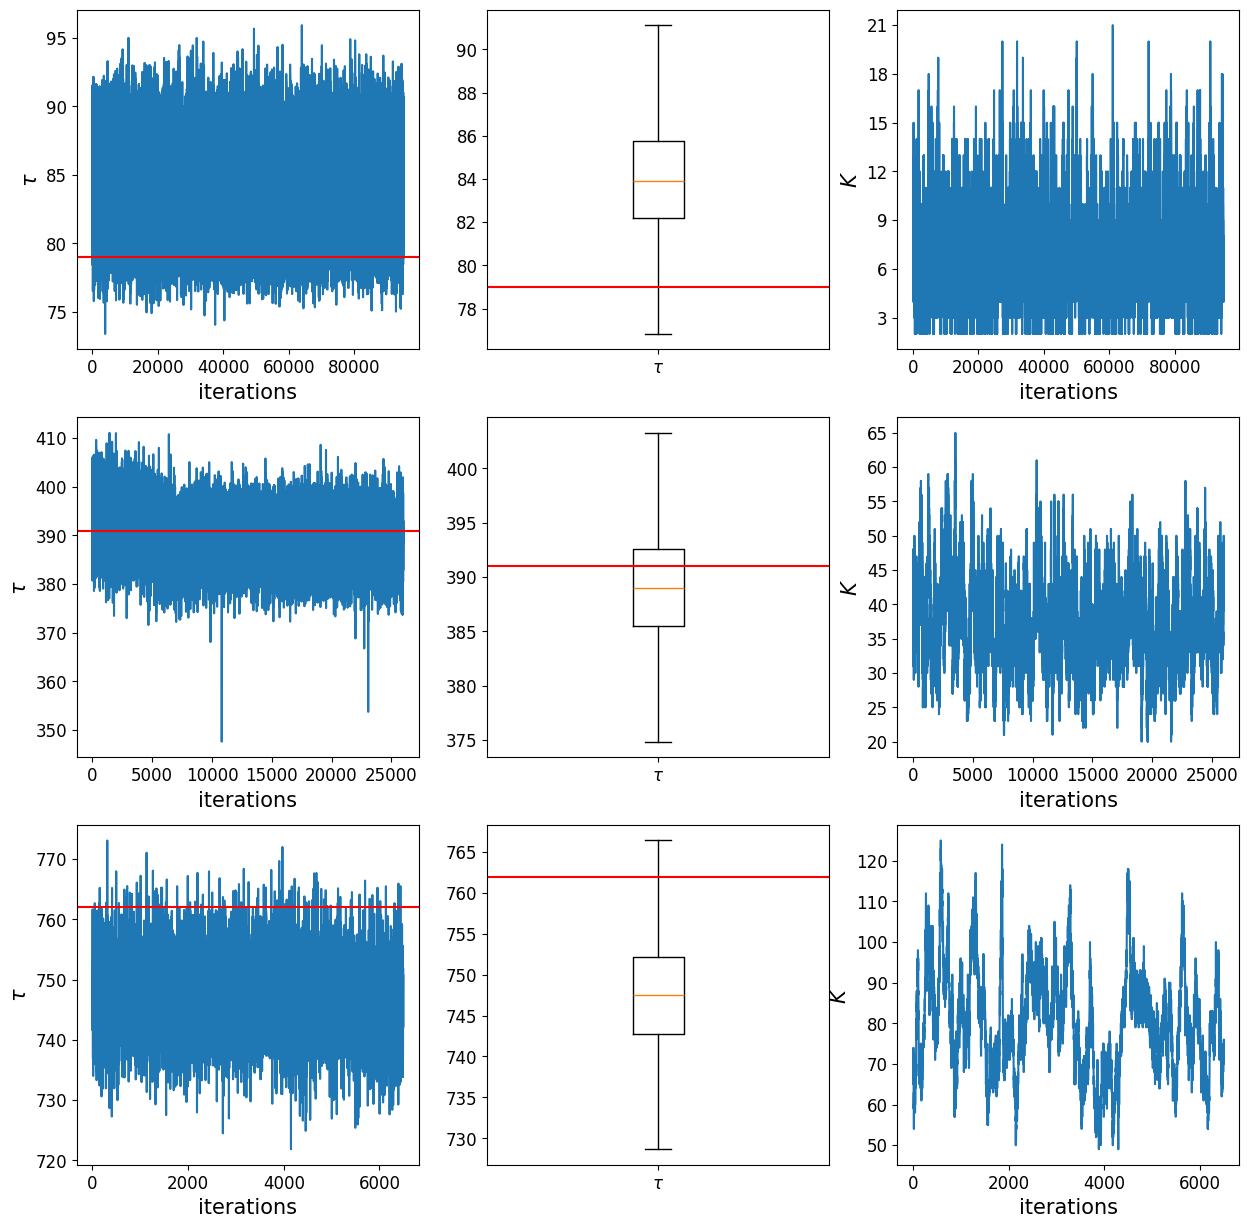

In [5]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

path = "data/synthetic/BNP/MonteCarlo/"
tau_insample = [79, 391, 762]
n_list = [1000, 5000, 10000]
times = [15120, 13732, 14677]

for i in range(3):

    tau_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_tau.npy")[1000:]
    K_chain = np.load(path+str(n_list[i])+"/synthdata_tau_"+str(n_list[i])+"_MCMC_K.npy")[1000:]

    ax[i,0].plot(tau_chain)
    ax[i,0].axhline(y=tau_insample[i], color = "red")
    ax[i,0].set_xlabel("iterations")
    ax[i,0].set_ylabel(r"$\tau$")

    ax[i,1].boxplot(tau_chain, showfliers=False)
    ax[i,1].axhline(y=tau_insample[i], color = "red")
    ax[i,1].set_xticklabels([r"$\tau$"])

    ax[i,2].plot(K_chain)
    ax[i,2].set_xlabel("iterations")
    ax[i,2].set_ylabel(r"$K$")

    ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

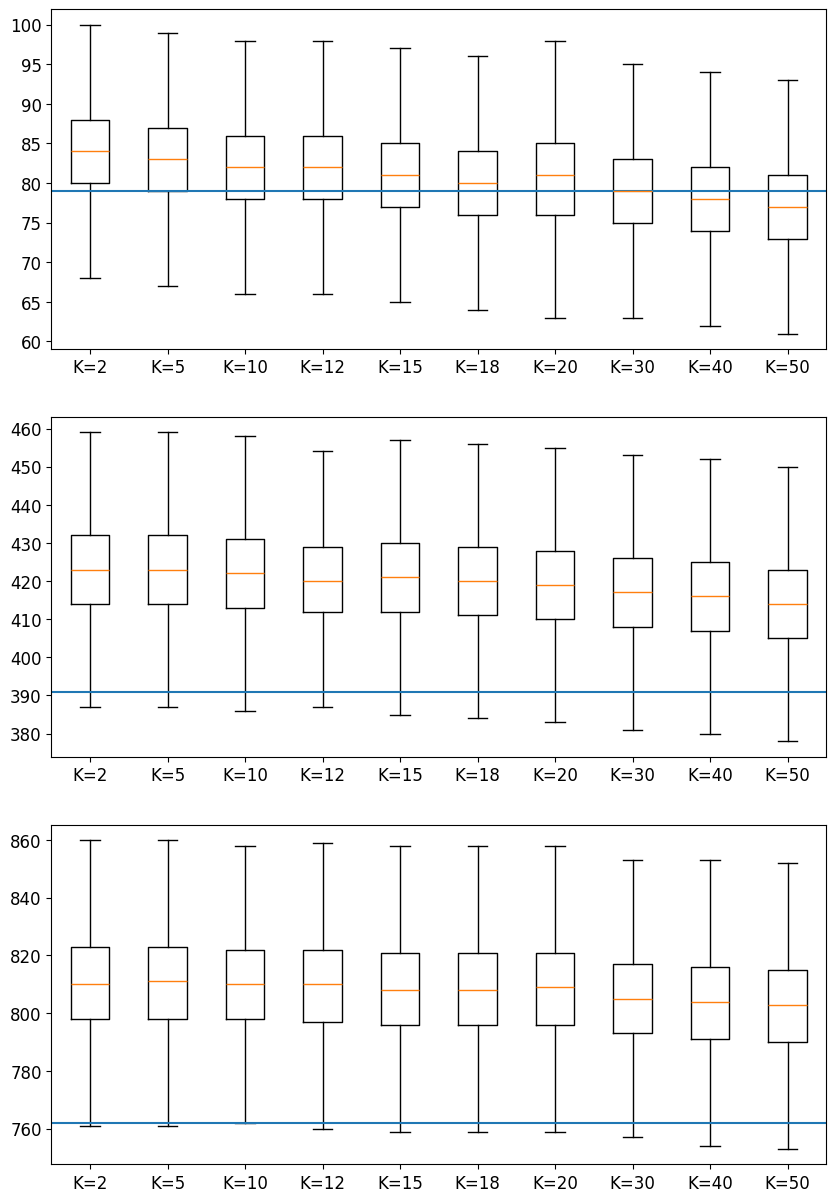

In [15]:
fig, ax = plt.subplots(3, 1, figsize = (10, 15))

path = "data/synthetic/MV/"

K_list = [2, 5, 10, 12, 15, 18, 20, 30, 40, 50]
tau_insample = [79, 391, 762]
n_list = [1000, 5000, 10000]
times = [[19448.5, 19721.9, 20918.7, 20845.4, 19489.4, 19792.4, 19306.7, 20039.7, 20354, 20270.4],
         [19936.7, 19989.6, 20025.4, 20470.4, 20956.6, 20488.5, 20328.1, 22673.4, 21974.6, 21487.2],
         [26486.4, 26831.1, 26984.7, 26932.2, 27236.6, 27894.1, 27730.6, 29418.4, 27525.5, 28426.6]]

for n in range(3):

    data_to_plot = []
    name_to_plot = []
    
    if n==0:
        nrk = 10

    else:
        nrk = 6

    for i in range(10):

        chain = np.load(path+str(n_list[n])+"/synthdata_tau_"+str(n_list[n])+"_"+str(i)+"_MCMC_tau.npy")[1::2]
        # chain = chain[chain<500]

        data_to_plot.append(chain)
        name_to_plot.append("K="+str(K_list[i]))

    # Create boxplot
    ax[n].boxplot(data_to_plot, showfliers=False)

    # Customize labels and title
    ax[n].set_xticklabels(name_to_plot)
    ax[n].axhline(y=tau_insample[n])

# US data

In [3]:
import os

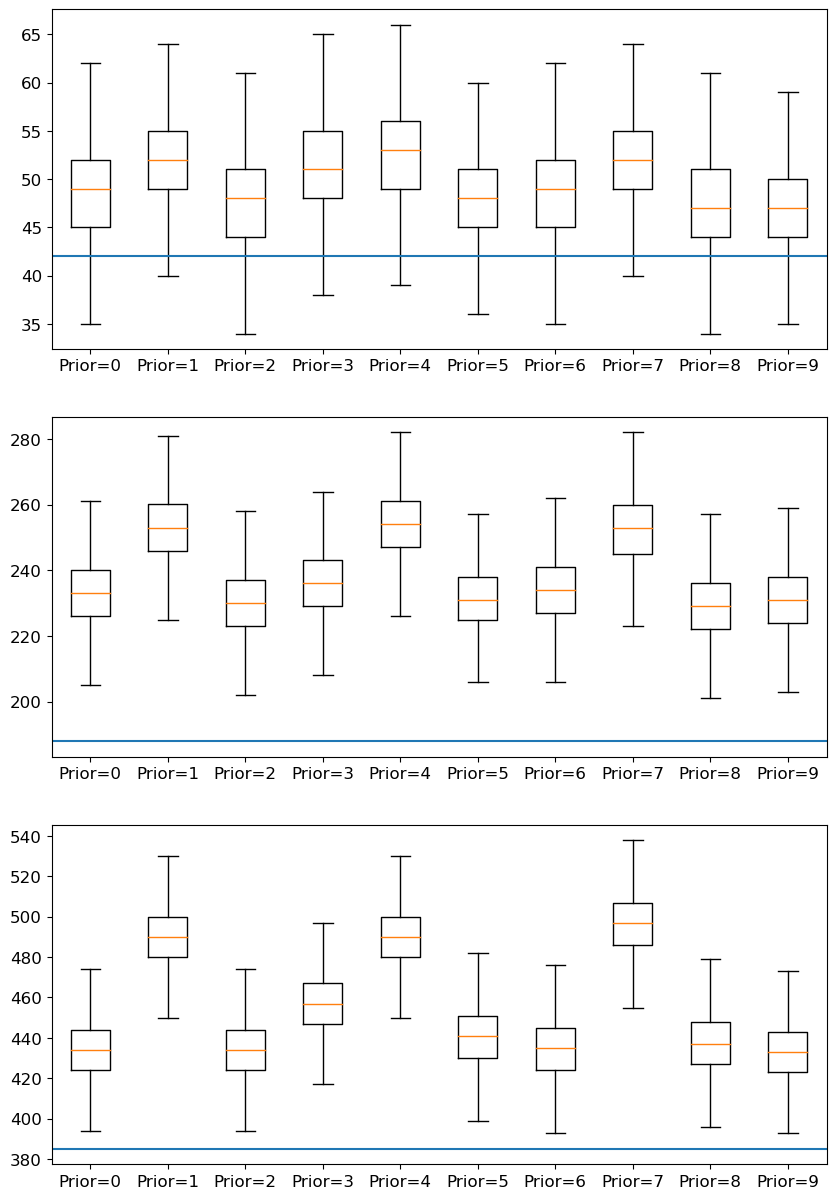

In [4]:
fig, ax = plt.subplots(3, 1, figsize = (10, 15))

path = "data/US/BNP/prior_change/"
tau_insample = [42, 188, 385]

n_list = [1000, 5000, 10000]

prior_alpha_0_list = [[2, 1], [2, 1], [  2,   1], [5, 1], [5, 1], [  5,   1], [5/4, 1/4], [5/4, 1/4], [5/4, 1/4], [1/2, 1/4]]
prior_alpha_list   = [[2, 1], [5, 1], [5/4, 1/4], [2, 1], [5, 1], [5/4, 1/4], [  2,   1], [  5,   1], [5/4, 1/4], [5/4, 1/4]]

for n in range(3):

    data_to_plot = []
    name_to_plot = []
    
    if n==0:
        nrk = 10

    else:
        nrk = 6

    for i in range(10):
        name_sim = "USdata_tau_alpha_0_"+str(prior_alpha_0_list[i][0])+"_"+str(prior_alpha_0_list[i][1])+"_alpha_"+str(prior_alpha_list[i][0])+"_"+str(prior_alpha_list[i][1])+"_n_"+str(n_list[n])+"_"

        if os.path.exists(path+str(n_list[n])+"/"+name_sim+"MCMC_tau.npy"):

            chain = np.load(path+str(n_list[n])+"/"+name_sim+"MCMC_tau.npy")
            # chain = chain[chain<500]

            data_to_plot.append(chain)
            name_to_plot.append("Prior="+str(i))

    # Create boxplot
    ax[n].boxplot(data_to_plot, showfliers=False)

    # Customize labels and title
    ax[n].set_xticklabels(name_to_plot)
    ax[n].axhline(y=tau_insample[n])

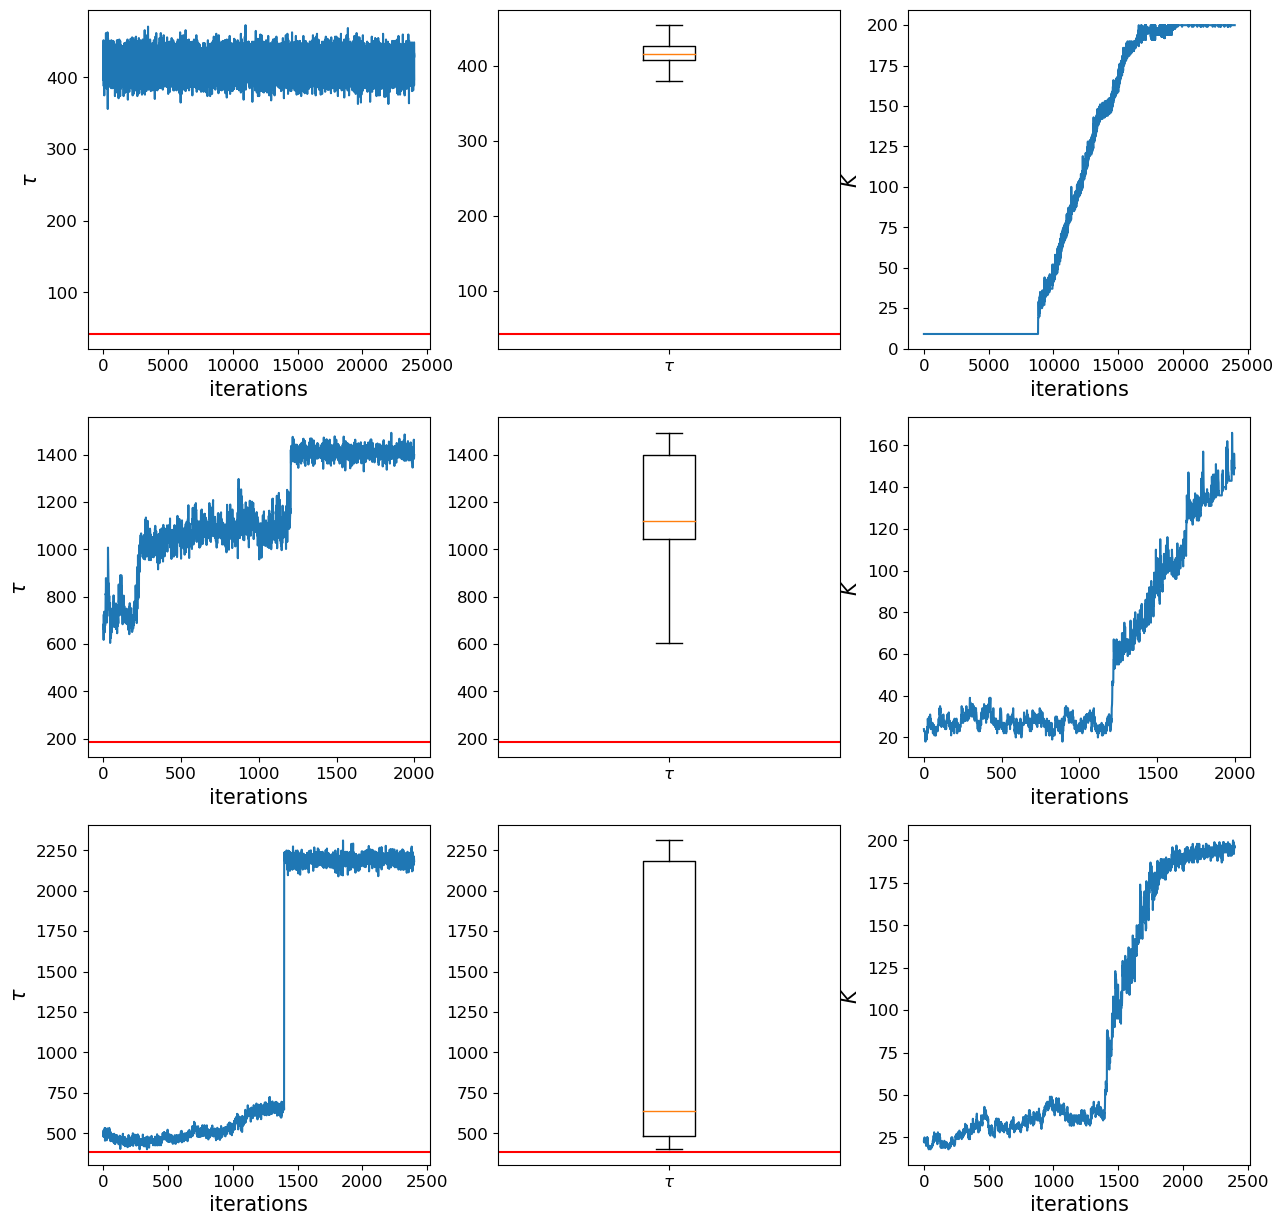

In [17]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

path = "data/US/BNP/prior_change/"
tau_insample = [42, 188, 385]
n_list = [1000, 5000, 10000]

prior_alpha_0_list = [[2, 1], [2, 1], [  2,   1], [5, 1], [5, 1], [  5,   1], [5/4, 1/4], [5/4, 1/4], [5/4, 1/4], [1/2, 1/4]]
prior_alpha_list   = [[2, 1], [5, 1], [5/4, 1/4], [2, 1], [5, 1], [5/4, 1/4], [  2,   1], [  5,   1], [5/4, 1/4], [5/4, 1/4]]

for i in range(3):
    
    iss = 2
    name_sim = "USdata_tau_alpha_0_"+str(prior_alpha_0_list[iss][0])+"_"+str(prior_alpha_0_list[iss][1])+"_alpha_"+str(prior_alpha_list[iss][0])+"_"+str(prior_alpha_list[iss][1])+"_n_"+str(n_list[i])+"_"

    tau_chain = np.load(path+str(n_list[i])+"/"+name_sim+"MCMC_tau.npy")
    K_chain = np.load(path+str(n_list[i])+"/"+name_sim+"MCMC_K.npy")

    ax[i,0].plot(tau_chain)
    ax[i,0].axhline(y=tau_insample[i], color = "red")
    ax[i,0].set_xlabel("iterations")
    ax[i,0].set_ylabel(r"$\tau$")

    ax[i,1].boxplot(tau_chain, showfliers=False)
    ax[i,1].axhline(y=tau_insample[i], color = "red")
    ax[i,1].set_xticklabels([r"$\tau$"])

    ax[i,2].plot(K_chain)
    ax[i,2].set_xlabel("iterations")
    ax[i,2].set_ylabel(r"$K$")

    ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

In [1]:
48000/3600


13.333333333333334

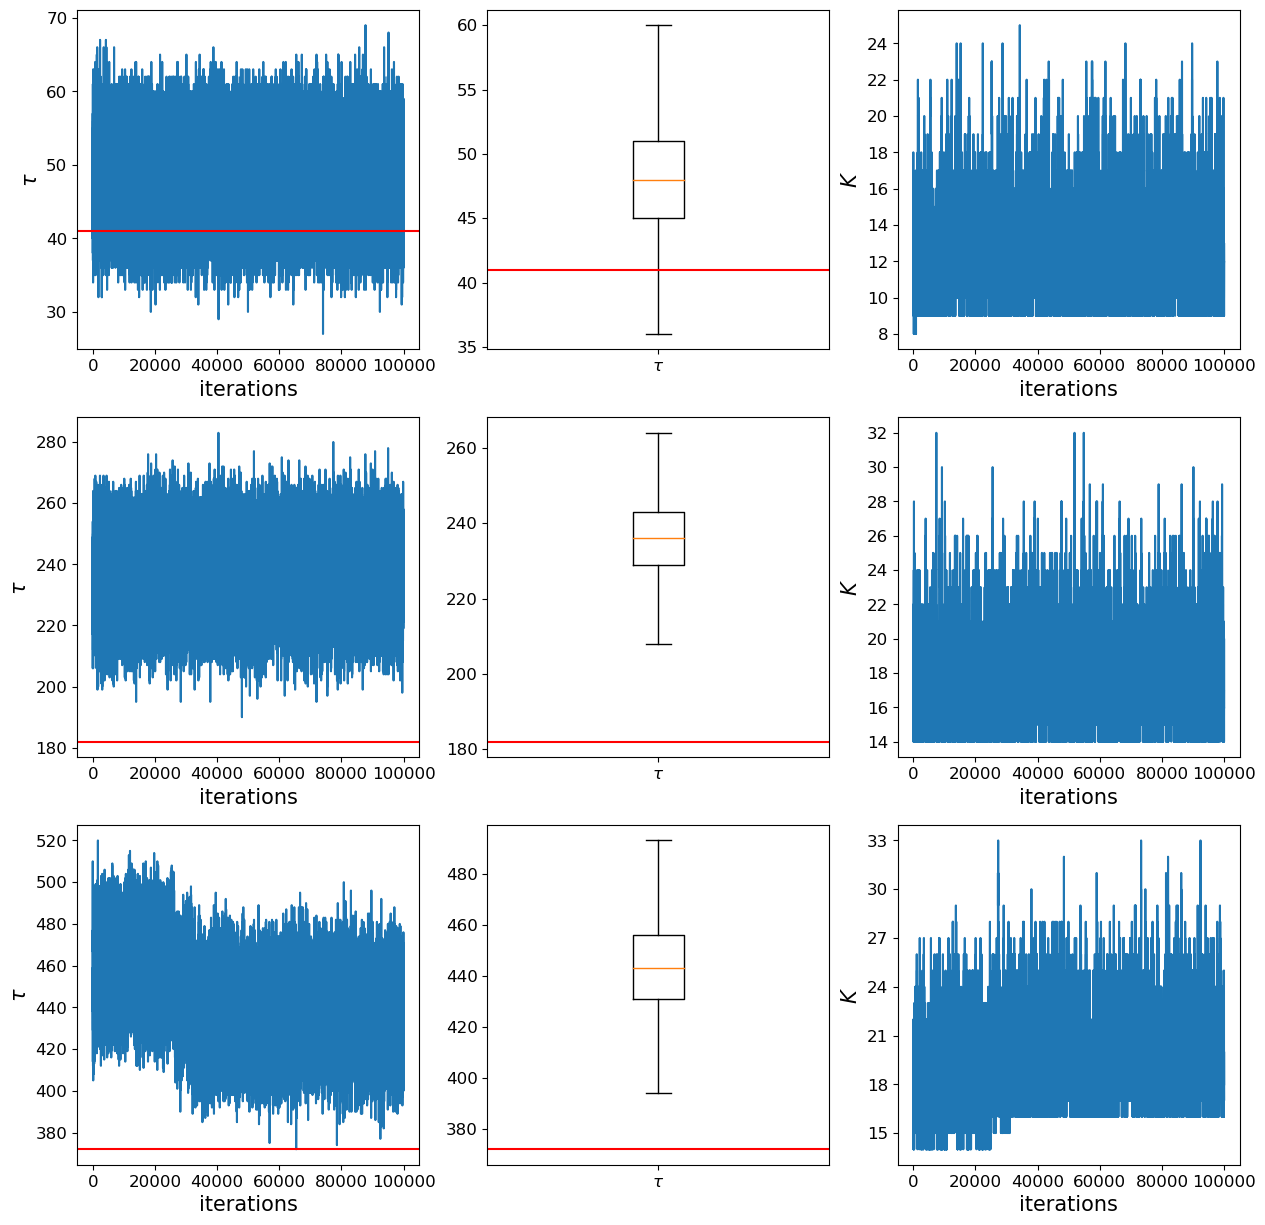

In [5]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

path = "data/US/choice_3/BNP/"
tau_insample = [41, 182, 372]
n_list = [1000, 5000, 10000]
times = [36984, 42296.5, 47948.3]

for i in range(3):

    tau_chain = np.load(path+str(n_list[i])+"/USdata_tau_"+str(n_list[i])+"_MCMC_tau.npy")
    K_chain = np.load(path+str(n_list[i])+"/USdata_tau_"+str(n_list[i])+"_MCMC_K.npy")

    ax[i,0].plot(tau_chain)
    ax[i,0].axhline(y=tau_insample[i], color = "red")
    ax[i,0].set_xlabel("iterations")
    ax[i,0].set_ylabel(r"$\tau$")

    ax[i,1].boxplot(tau_chain, showfliers=False)
    ax[i,1].axhline(y=tau_insample[i], color = "red")
    ax[i,1].set_xticklabels([r"$\tau$"])

    ax[i,2].plot(K_chain)
    ax[i,2].set_xlabel("iterations")
    ax[i,2].set_ylabel(r"$K$")

    ax[i,2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))